In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [52]:
titanic = pd.read_csv('titanic_data.csv')

In [53]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [54]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [55]:
titanic.isnull().sum()/len(titanic)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

<BarContainer object of 12 artists>

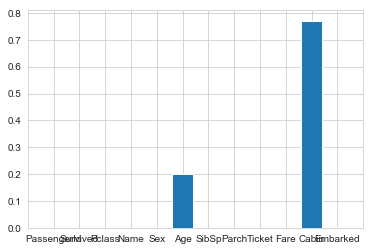

In [56]:
plt.bar(titanic.columns, titanic.isnull().sum()/ len(titanic))

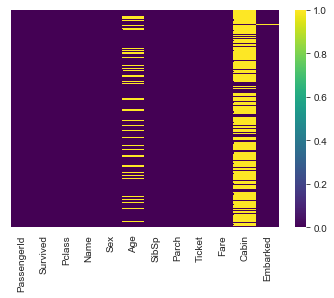

In [57]:
sns.heatmap(titanic.isnull(), yticklabels = False, cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

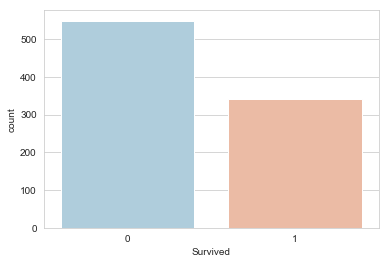

In [58]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=titanic, palette = 'RdBu_r')

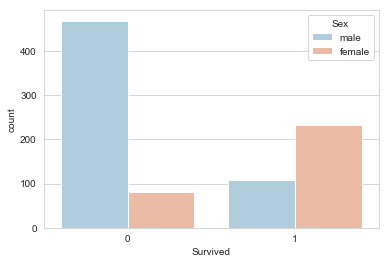

In [59]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=titanic, palette = 'RdBu_r')

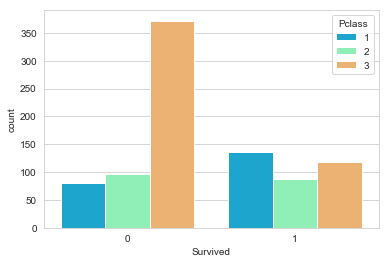

In [60]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=titanic, palette = 'rainbow')

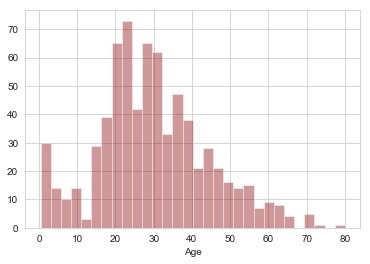

In [61]:
sns.distplot(titanic['Age'].dropna(), kde=False, bins=30, color='darkred')

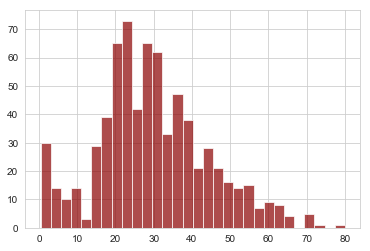

In [62]:
titanic['Age'].hist(bins=30, color='darkred', alpha=0.7)

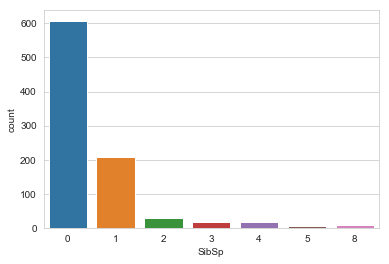

In [63]:
# 시각화를 해보면 혼자온사람이 대부분이라는걸 알 수 있다.
sns.countplot(x='SibSp', data=titanic)

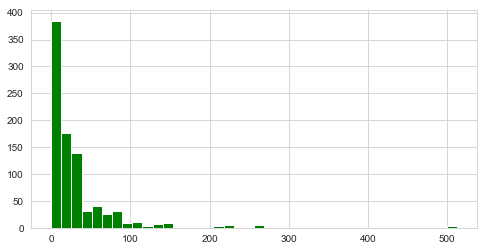

In [64]:
titanic['Fare'].hist(bins=40, color='green', figsize=(8,4))

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


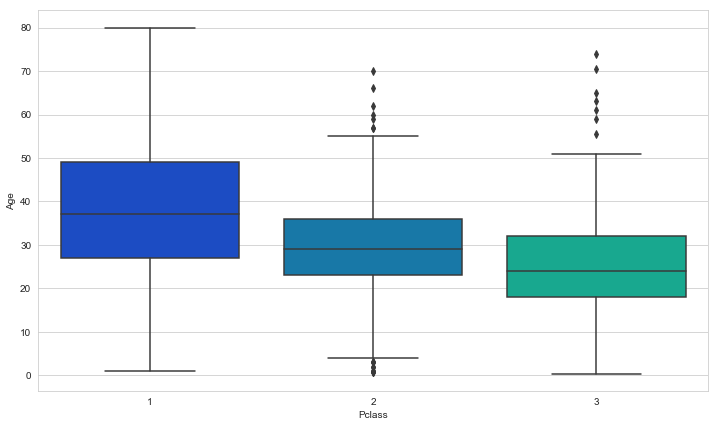

In [65]:
# 클래스 별 평균나이를 알아보기 위한 시각화
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=titanic, palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [66]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [67]:
titanic.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [68]:
titanic.groupby('Pclass')['Age'].mean().loc[1]

38.233440860215055

In [69]:
# nan 값들을 각 class의 평균 값으로 대체
titanic.fillna(titanic.mean(), inplace=True)
# titanic.where(pd.notnull(titanic), titanic.mean(), axis='columns')
# titanic['Age'] = titanic['Age'].fillna(titanic.groupby('Pclass')['Age'].transform('mean'))
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


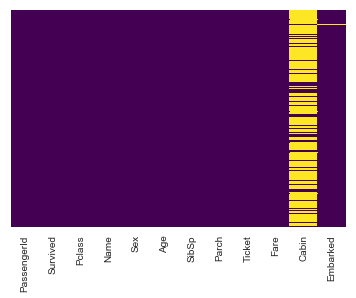

In [70]:
sns.heatmap(titanic.isnull(), yticklabels = False, cbar=False, cmap='viridis')

Now apply that function!

In [71]:
def impute_args(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38.233441
        elif Pclass == 2:
            return 29.877630
        else:
            return 25.140620
    else:
        return Age

titanic['Age'] = titanic[['Age', 'Pclass']].apply(impute_args, axis = 1)

Now let's check that heat map again!

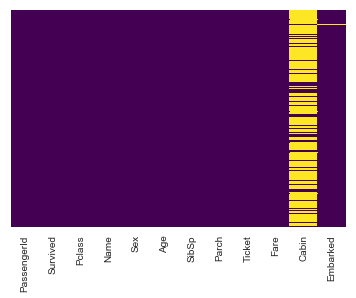

In [72]:
sns.heatmap(titanic.isnull(), yticklabels = False, cbar=False, cmap='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [73]:
titanic.drop('Cabin',inplace = True, axis = 1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


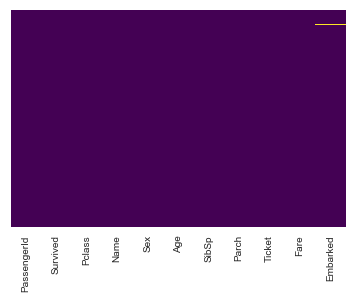

In [74]:
sns.heatmap(titanic.isnull(), yticklabels = False, cbar=False, cmap='viridis')

In [75]:
titanic.dropna(inplace=True)

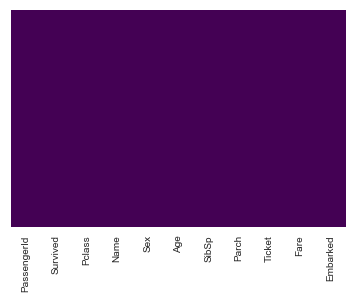

In [76]:
sns.heatmap(titanic.isnull(), yticklabels = False, cbar=False, cmap='viridis')

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [77]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [78]:
titanic.drop(['Name', 'Ticket'], axis = 1, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [80]:
titanic = pd.get_dummies(titanic)

Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [81]:
x = titanic.drop('Survived', axis = 1)
y = titanic['Survived']

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=77)

## Training and Predicting

In [83]:
from sklearn.linear_model import LogisticRegression

In [85]:
logmodel = LogisticRegression()

In [86]:
logmodel.fit(x_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [88]:
# prediction
predictions = logmodel.predict(x_test)

In [89]:
print(predictions)

[1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0
 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0
 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1
 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1
 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0]


Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

In [90]:
from sklearn.metrics import classification_report, confusion_matrix

In [92]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       154
           1       0.89      0.71      0.79       113

   micro avg       0.84      0.84      0.84       267
   macro avg       0.85      0.82      0.83       267
weighted avg       0.85      0.84      0.84       267



In [94]:
confusion_matrix(y_test, predictions)

array([[144,  10],
       [ 33,  80]], dtype=int64)